# **A Study of Gender Pay Inequity in France using INSEE salary Dataset**
### **Course**: Machine learning and data mining - University of Neuchâtel 
### **Group**: Lien Beroggi, Matteo Biner, Jules Odje, Benno Thalmann
### **Date**: December 2023
***

## **Introduction**

The __[Fifth Goal](https://www.un.org/sustainabledevelopment/gender-equality/)__ of the sustainable development goals issued by the United Nations organization is to achieve gender equality and empower all women and girls by 2030. A goal that encapsulates many issues, including equality at work and particularly wage equality. It is precisely the latter aspect that is the focus of the following study, which attempts to gain a deeper understanding of the complex phenomenon of the gender pay gap. Also __[the European Commission ](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Gender_pay_gap_statistics#Possible_causes_of_the_unadjusted_gender_pay_gap)__ prioritized "reducing the gender pay, earnings and pension gaps and thus fighting poverty among women" as one of the key areas in the framework of the __["A Union of Equality: Gender Equality Strategy 2020-2025"](https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX%3A52020DC0152)__. 

In particular, the following analysis will focus on the situation in France from 2012 to 2021, analyzing data provided by the French National Institute of Statistics and Economic Studies (Insee). We chose to analyze the French context because a law aimed at decreasing gender inequality in the workplace was recently enacted in September 2018, so it is interesting for us to analyze the impact of tighter regulation and try to answer the question: does this type of legislation serve its intended purpose? 

The goal is to analyze the problem in depth and understand what political, legal and cultural scenarios could help achieve gender equality in this area as well. To do this, it is necessary to thoroughly understand the data available to us, first analyzing the past situation, and possible correlations between salary, gender, and skill level; then trying to predict thanks to different machine learning models possible future evolutions. 


## **1. Data Collection and Preprocessing**

### **Description of the INSEE Dataset**

The dataset, sourced from the __[French National Institute of Statistics and Economic Studies (Insee)](https://www.insee.fr/fr/statistiques/2021266#consulter)__, provides a comprehensive exploration of average net hourly wages from 2012 to 2021. This extensive dataset categorizes wage indicators based on gender (Women/Men), age (18 to 25 years old/26 to 50 years old/over 50 years old), and socioeconomic classification, excluding the agricultural sector.

Geographic levels span from the local to national scale, encompassing municipalities, municipal arrondissements, regions, departments, employment zones, and public inter-municipal cooperation establishments in France, excluding Mayotte. We decided to consider only departmental divisions to facilitate data management. 

Key features include the breakdown of wage data by gender, allowing for the examination of gender-based income differences. Age categorization further enables an exploration of wage variations across different age groups. The dataset also includes socioeconomic classifications, providing insights into wage differentials across various professional categories. The following are the variables used in the dataset with their translations. Each variable is provided for the total number of individuals considered, for men only (abbreviation H) and for women only (abbreviation F).

- Salaire net horaire moyen (€) - Net average hourly wage (€)

- Salaire net horaire moyen des personnes de 18 à 25 ans (€)  - Net average hourly wage for individuals aged 18 to 25 (€)
- Salaire net horaire moyen des personnes de 26 à 50 ans (€)  - Net average hourly wage for individuals aged 26 to 50 (€)
- Salaire net horaire moyen des personnes de plus de 50 ans (€) - Net average hourly wage for individuals over 50 (€)

- Salaire net horaire moyen des cadres, professions intellectuelles supérieures et des chefs d'entreprises salariés (€) - Net average hourly wage for executives, higher intellectual professions, and salaried company directors (€)
- Salaire net horaire moyen des professions intermédiaires (€) - Net average hourly wage for intermediate professions (€)
- Salaire net horaire moyen des employés (€) - Net average hourly wage for employees (€)
- Salaire net horaire moyen des ouvriers (€) - Net average hourly wage for workers (€)

### **Data Cleaning and Preparation**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

# Leggi il tuo file Excel
excel_file_path = "base-cc-bases-tous-salaries-DEP.xlsx"
xls = pd.ExcelFile(excel_file_path)
geo = pd.read_excel("name_geographic_information.xlsx")

sheet_names = xls.sheet_names

cleaned_data = {}

for sheet_name in sheet_names:
    data = pd.read_excel(excel_file_path, sheet_name=sheet_name, header=1)
    data = data.dropna()
    data = data.drop_duplicates()

    cleaned_data[sheet_name] = data

In [2]:
sheet_2014_cleaned = cleaned_data['2014']
sheet_2014_cleaned.head()

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
0,01,Ain,13.579192,24.318038,14.672637,10.691140,11.124987,11.902937,20.733701,13.270286,...,11.484325,9.630959,13.528282,15.627263,9.221513,11.991460,12.933505,9.914570,14.575813,17.554632
1,02,Aisne,12.519306,22.937449,14.292954,10.270965,11.066076,11.264148,19.628428,13.028419,...,11.307992,9.425204,12.385686,14.183905,9.036727,11.258183,12.290001,9.667367,13.010117,15.233436
2,03,Allier,12.102450,22.705708,13.821143,9.945086,10.646654,10.901292,18.991257,12.795915,...,10.876635,9.232072,11.866786,13.887266,8.883539,10.777793,12.000414,9.467820,12.587624,15.255711
3,04,Alpes-de-Haute-Provence,12.728979,23.415111,14.168949,10.053573,10.793038,11.293278,20.157254,12.672770,...,11.083610,9.333682,12.464061,14.887499,9.038924,11.206481,12.487647,9.548087,13.360582,16.685640
4,05,Hautes-Alpes,12.040682,21.631940,13.710586,9.974411,10.718089,10.993353,18.626921,12.772498,...,10.963095,9.215207,11.747280,14.169468,8.931636,10.806876,12.393342,9.420320,12.438204,15.599626


Now we can explore the dataset and calculate the gender pay gap. The gender wage gap is the average difference between the hourly wages earned by men and women expressed in percentage terms.
### 1. Mean gender gap for total worker sorted by year: 

In [3]:
# Initialize a dictionary to store the results
mean_gender_gap_results = {}

# Iterate through all sheets
for sheet_name, data in cleaned_data.items():

    columns_total = [col for col in data.columns if col.startswith('SNHM')]
    columns_women = [col for col in data.columns if col.startswith('SNHMF')]
    columns_men = [col for col in data.columns if col.startswith('SNHMH')]

    # Check if there are matching columns
    if columns_total and columns_women and columns_men:
        # Calculate the mean gender gap for Total Worker
        mean_gender_gap_total_worker = ((data[columns_men[0]] - data[columns_women[0]]).mean() / data[columns_men[0]].mean()) * 100

        # Save the result in the dictionary with the sheet name as the key
        mean_gender_gap_results[sheet_name] = mean_gender_gap_total_worker

# Print the results
for sheet_name, mean_gender_gap in mean_gender_gap_results.items():
    print(f"Mean Gender Gap for Total Worker in {sheet_name}: {mean_gender_gap:.2f}%")



Mean Gender Gap for Total Worker in 2012: 16.21%
Mean Gender Gap for Total Worker in 2013: 17.07%
Mean Gender Gap for Total Worker in 2014: 16.69%
Mean Gender Gap for Total Worker in 2015: 16.54%
Mean Gender Gap for Total Worker in 2016: 16.88%
Mean Gender Gap for Total Worker in 2017: 14.80%
Mean Gender Gap for Total Worker in 2018: 15.67%
Mean Gender Gap for Total Worker in 2019: 15.15%
Mean Gender Gap for Total Worker in 2020: 14.50%
Mean Gender Gap for Total Worker in 2021: 14.00%


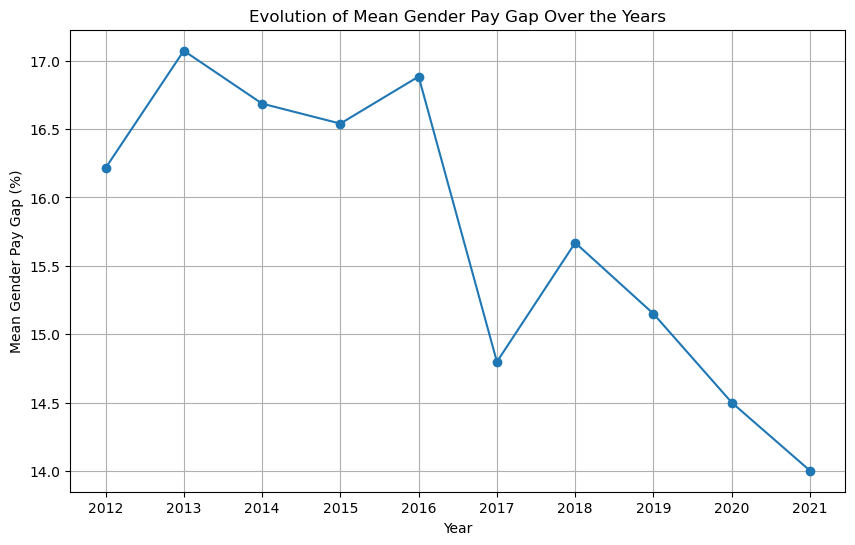

In [4]:
import matplotlib.pyplot as plt

# Sort the results by year
sorted_results = sorted(mean_gender_gap_results.items())

# Extract years and corresponding mean gender pay gaps
years, gender_gaps = zip(*sorted_results)

# Plotting the evolution of the mean gender pay gap over the years
plt.figure(figsize=(10, 6))
plt.plot(years, gender_gaps, marker='o', linestyle='-')
plt.title('Evolution of Mean Gender Pay Gap Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Gender Pay Gap (%)')
plt.grid(True)
plt.show()

### 2. Mean gender pay gap based on age classification

In [5]:
# Initialize a dictionary to store the results
mean_gender_gap_results_age18 = {}

# Iterate through all sheets
for sheet_name, data in cleaned_data.items():

    columns_women = [col for col in data.columns if col.startswith('SNHMF18')]
    columns_men = [col for col in data.columns if col.startswith('SNHMH18')]

    # Check if there are matching columns
    if columns_total and columns_women and columns_men:
        # Calculate the mean gender gap for Total Worker
        mean_gender_gap_age18 = ((data[columns_men[0]] - data[columns_women[0]]).mean() / data[columns_men[0]].mean()) * 100

        # Save the result in the dictionary with the sheet name as the key
        mean_gender_gap_results_age18[sheet_name] = mean_gender_gap_age18

# Print the results
for sheet_name, mean_gender_gap in mean_gender_gap_results_age18.items():
    print(f"Mean gender pay gap for workers aged 18 to 25 years old in {sheet_name}: {mean_gender_gap:.2f}%")

Mean gender pay gap for workers aged 18 to 25 years old in 2012: 6.38%
Mean gender pay gap for workers aged 18 to 25 years old in 2013: 6.50%
Mean gender pay gap for workers aged 18 to 25 years old in 2014: 6.13%
Mean gender pay gap for workers aged 18 to 25 years old in 2015: 6.05%
Mean gender pay gap for workers aged 18 to 25 years old in 2016: 6.25%
Mean gender pay gap for workers aged 18 to 25 years old in 2017: 4.94%
Mean gender pay gap for workers aged 18 to 25 years old in 2018: 5.54%
Mean gender pay gap for workers aged 18 to 25 years old in 2019: 5.57%
Mean gender pay gap for workers aged 18 to 25 years old in 2020: 4.60%
Mean gender pay gap for workers aged 18 to 25 years old in 2021: 4.31%


In [6]:
# Initialize a dictionary to store the results
mean_gender_gap_results_age26 = {}

# Iterate through all sheets
for sheet_name, data in cleaned_data.items():

    columns_women = [col for col in data.columns if col.startswith('SNHMF26')]
    columns_men = [col for col in data.columns if col.startswith('SNHMH26')]

    # Check if there are matching columns
    if columns_total and columns_women and columns_men:
        # Calculate the mean gender gap for Total Worker
        mean_gender_gap_age26 = ((data[columns_men[0]] - data[columns_women[0]]).mean() / data[columns_men[0]].mean()) * 100

        # Save the result in the dictionary with the sheet name as the key
        mean_gender_gap_results_age26[sheet_name] = mean_gender_gap_age26

# Print the results
for sheet_name, mean_gender_gap in mean_gender_gap_results_age26.items():
    print(f"Mean gender pay gap for workers aged 26 to 50 years old in {sheet_name}: {mean_gender_gap:.2f}%")

Mean gender pay gap for workers aged 26 to 50 years old in 2012: 14.96%
Mean gender pay gap for workers aged 26 to 50 years old in 2013: 15.23%
Mean gender pay gap for workers aged 26 to 50 years old in 2014: 14.72%
Mean gender pay gap for workers aged 26 to 50 years old in 2015: 14.39%
Mean gender pay gap for workers aged 26 to 50 years old in 2016: 14.64%
Mean gender pay gap for workers aged 26 to 50 years old in 2017: 12.26%
Mean gender pay gap for workers aged 26 to 50 years old in 2018: 13.32%
Mean gender pay gap for workers aged 26 to 50 years old in 2019: 12.96%
Mean gender pay gap for workers aged 26 to 50 years old in 2020: 12.14%
Mean gender pay gap for workers aged 26 to 50 years old in 2021: 11.82%


In [7]:
# Initialize a dictionary to store the results
mean_gender_gap_results_age50 = {}

# Iterate through all sheets
for sheet_name, data in cleaned_data.items():

    columns_women = [col for col in data.columns if col.startswith('SNHMF50')]
    columns_men = [col for col in data.columns if col.startswith('SNHMH50')]

    # Check if there are matching columns
    if columns_total and columns_women and columns_men:
        # Calculate the mean gender gap for Total Worker
        mean_gender_gap_age50 = ((data[columns_men[0]] - data[columns_women[0]]).mean() / data[columns_men[0]].mean()) * 100

        # Save the result in the dictionary with the sheet name as the key
        mean_gender_gap_results_age50[sheet_name] = mean_gender_gap_age50

# Print the results
for sheet_name, mean_gender_gap in mean_gender_gap_results_age50.items():
    print(f"Mean gender pay gap for workers aged over 50 years old in {sheet_name}: {mean_gender_gap:.2f}%")

Mean gender pay gap for workers aged over 50 years old in 2012: 22.13%
Mean gender pay gap for workers aged over 50 years old in 2013: 23.72%
Mean gender pay gap for workers aged over 50 years old in 2014: 23.38%
Mean gender pay gap for workers aged over 50 years old in 2015: 23.23%
Mean gender pay gap for workers aged over 50 years old in 2016: 23.52%
Mean gender pay gap for workers aged over 50 years old in 2017: 21.85%
Mean gender pay gap for workers aged over 50 years old in 2018: 22.39%
Mean gender pay gap for workers aged over 50 years old in 2019: 21.54%
Mean gender pay gap for workers aged over 50 years old in 2020: 21.09%
Mean gender pay gap for workers aged over 50 years old in 2021: 20.44%


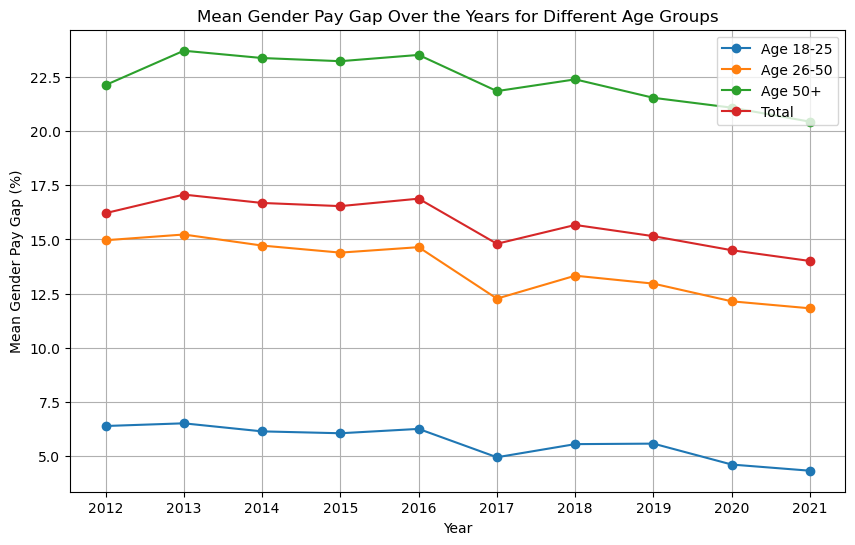

In [20]:
import matplotlib.pyplot as plt

# Initialize dictionaries to store the results for different age groups
mean_gender_gap_results_age18 = {}
mean_gender_gap_results_age26 = {}
mean_gender_gap_results_age50 = {}

# Iterate through all sheets
for sheet_name, data in cleaned_data.items():

    # Extract columns for women and men in different age groups
    columns_women_age18 = [col for col in data.columns if col.startswith('SNHMF18')]
    columns_men_age18 = [col for col in data.columns if col.startswith('SNHMH18')]

    columns_women_age26 = [col for col in data.columns if col.startswith('SNHMF26')]
    columns_men_age26 = [col for col in data.columns if col.startswith('SNHMH26')]

    columns_women_age50 = [col for col in data.columns if col.startswith('SNHMF50')]
    columns_men_age50 = [col for col in data.columns if col.startswith('SNHMH50')]

    # Check if there are matching columns for each age group
    if columns_women_age18 and columns_men_age18:
        mean_gender_gap_age18 = ((data[columns_men_age18[0]] - data[columns_women_age18[0]]).mean() / data[columns_men_age18[0]].mean()) * 100
        mean_gender_gap_results_age18[sheet_name] = mean_gender_gap_age18

    if columns_women_age26 and columns_men_age26:
        mean_gender_gap_age26 = ((data[columns_men_age26[0]] - data[columns_women_age26[0]]).mean() / data[columns_men_age26[0]].mean()) * 100
        mean_gender_gap_results_age26[sheet_name] = mean_gender_gap_age26

    if columns_women_age50 and columns_men_age50:
        mean_gender_gap_age50 = ((data[columns_men_age50[0]] - data[columns_women_age50[0]]).mean() / data[columns_men_age50[0]].mean()) * 100
        mean_gender_gap_results_age50[sheet_name] = mean_gender_gap_age50

# Plotting the results for different age groups on the same graph
plt.figure(figsize=(10, 6))

# Plot the results for age 18
plt.plot(mean_gender_gap_results_age18.keys(), mean_gender_gap_results_age18.values(), marker='o', linestyle='-', label='Age 18-25')

# Plot the results for age 26
plt.plot(mean_gender_gap_results_age26.keys(), mean_gender_gap_results_age26.values(), marker='o', linestyle='-', label='Age 26-50')

# Plot the results for age 50 and over
plt.plot(mean_gender_gap_results_age50.keys(), mean_gender_gap_results_age50.values(), marker='o', linestyle='-', label='Age 50+')

plt.plot(mean_gender_gap_results.keys(), mean_gender_gap_results.values(), marker='o', linestyle='-', label='Total')

plt.title('Mean Gender Pay Gap Over the Years for Different Age Groups')
plt.xlabel('Year')
plt.ylabel('Mean Gender Pay Gap (%)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
pd.DataFrame([mean_gender_gap_results, mean_gender_gap_results_age18, mean_gender_gap_results_age26, mean_gender_gap_results_age50], 
             index = [ "Total worker", "age >50", "age 26-50","age 18-25"], 
             columns = ['2012', "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"])

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Total worker,16.213745,17.071548,16.685229,16.539097,16.882971,14.798850,15.668732,15.149589,14.501214,14.003264
age >50,6.380656,6.504653,6.132664,6.045486,6.246717,4.936608,5.543028,5.566172,4.599595,4.314565
age 26-50,14.962183,15.227130,14.716590,14.390604,14.642293,12.264914,13.324824,12.957905,12.140206,11.817509
age 18-25,22.130250,23.717971,23.380585,23.234396,23.523774,21.852076,22.394835,21.542008,21.086787,20.439302


### 3. Gender pay gap based on position level

In [16]:
# Initialize a dictionary to store the results
mean_gender_gap_results_executive = {}

# Iterate through all sheets
for sheet_name, data in cleaned_data.items():
    columns_women = [col for col in data.columns if col.startswith('SNHMFC')]
    columns_men = [col for col in data.columns if col.startswith('SNHMHC')]

    # Check if there are matching columns
    if columns_total and columns_women and columns_men:
        # Calculate the mean gender gap for Total Worker
        mean_gender_gap_total_worker_executive = ((data[columns_men[0]] - data[columns_women[0]]).mean() / data[columns_men[0]].mean()) * 100

        # Save the result in the dictionary with the sheet name as the key
        mean_gender_gap_results_executive[sheet_name] = mean_gender_gap_total_worker_executive

# Print the results
for sheet_name, mean_gender_gap in mean_gender_gap_results_executive.items():
    print(f"Mean Gender Gap for Executive positions in {sheet_name}: {mean_gender_gap:.2f}%")

Mean Gender Gap for Executives in 2012: 19.74%
Mean Gender Gap for Executives in 2013: 20.76%
Mean Gender Gap for Executives in 2014: 19.92%
Mean Gender Gap for Executives in 2015: 19.48%
Mean Gender Gap for Executives in 2016: 20.12%
Mean Gender Gap for Executives in 2017: 18.57%
Mean Gender Gap for Executives in 2018: 19.04%
Mean Gender Gap for Executives in 2019: 17.84%
Mean Gender Gap for Executives in 2020: 17.39%
Mean Gender Gap for Executives in 2021: 16.83%


In [17]:
# Initialize a dictionary to store the results
mean_gender_gap_results_Intermadiate = {}

# Iterate through all sheets
for sheet_name, data in cleaned_data.items():
    columns_women = [col for col in data.columns if col.startswith('SNHMFP')]
    columns_men = [col for col in data.columns if col.startswith('SNHMHP')]

    # Check if there are matching columns
    if columns_total and columns_women and columns_men:
        # Calculate the mean gender gap for Total Worker
        mean_gender_gap_total_worker_Intermadiate = ((data[columns_men[0]] - data[columns_women[0]]).mean() / data[columns_men[0]].mean()) * 100

        # Save the result in the dictionary with the sheet name as the key
        mean_gender_gap_results_Intermadiate[sheet_name] = mean_gender_gap_total_worker_Intermadiate

# Print the results
for sheet_name, mean_gender_gap in mean_gender_gap_results_Intermadiate.items():
    print(f"Mean Gender Gap for Intermadiate positions in {sheet_name}: {mean_gender_gap:.2f}%")

Mean Gender Gap for Intermadiate positions in 2012: 12.75%
Mean Gender Gap for Intermadiate positions in 2013: 13.01%
Mean Gender Gap for Intermadiate positions in 2014: 13.27%
Mean Gender Gap for Intermadiate positions in 2015: 13.19%
Mean Gender Gap for Intermadiate positions in 2016: 13.44%
Mean Gender Gap for Intermadiate positions in 2017: 11.78%
Mean Gender Gap for Intermadiate positions in 2018: 12.66%
Mean Gender Gap for Intermadiate positions in 2019: 12.64%
Mean Gender Gap for Intermadiate positions in 2020: 12.04%
Mean Gender Gap for Intermadiate positions in 2021: 11.95%


In [18]:
# Initialize a dictionary to store the results
mean_gender_gap_results_employee = {}

# Iterate through all sheets
for sheet_name, data in cleaned_data.items():

    columns_women = [col for col in data.columns if col.startswith('SNHMFE')]
    columns_men = [col for col in data.columns if col.startswith('SNHMHE')]

    # Check if there are matching columns
    if columns_total and columns_women and columns_men:
        # Calculate the mean gender gap for Total Worker
        mean_gender_gap_total_worker_employee = ((data[columns_men[0]] - data[columns_women[0]]).mean() / data[columns_men[0]].mean()) * 100

        # Save the result in the dictionary with the sheet name as the key
        mean_gender_gap_results_employee[sheet_name] = mean_gender_gap_total_worker_employee

# Print the results
for sheet_name, mean_gender_gap in mean_gender_gap_results_employee.items():
    print(f"Mean Gender Gap for Employees in {sheet_name}: {mean_gender_gap:.2f}%")

Mean Gender Gap for Employees in 2012: 7.06%
Mean Gender Gap for Employees in 2013: 6.89%
Mean Gender Gap for Employees in 2014: 6.98%
Mean Gender Gap for Employees in 2015: 6.65%
Mean Gender Gap for Employees in 2016: 6.43%
Mean Gender Gap for Employees in 2017: 5.57%
Mean Gender Gap for Employees in 2018: 5.58%
Mean Gender Gap for Employees in 2019: 5.40%
Mean Gender Gap for Employees in 2020: 4.37%
Mean Gender Gap for Employees in 2021: 4.30%


In [19]:
# Initialize a dictionary to store the results
mean_gender_gap_results_worker = {}

# Iterate through all sheets
for sheet_name, data in cleaned_data.items():

    columns_women = [col for col in data.columns if col.startswith('SNHMFO')]
    columns_men = [col for col in data.columns if col.startswith('SNHMHO')]

    # Check if there are matching columns
    if columns_total and columns_women and columns_men:
        # Calculate the mean gender gap for Total Worker
        mean_gender_gap_total_worker_worker = ((data[columns_men[0]] - data[columns_women[0]]).mean() / data[columns_men[0]].mean()) * 100

        # Save the result in the dictionary with the sheet name as the key
        mean_gender_gap_results_worker[sheet_name] = mean_gender_gap_total_worker_worker

# Print the results
for sheet_name, mean_gender_gap in mean_gender_gap_results_worker.items():
    print(f"Mean Gender Gap for Worker in {sheet_name}: {mean_gender_gap:.2f}%")

Mean Gender Gap for Worker in 2012: 13.74%
Mean Gender Gap for Worker in 2013: 14.66%
Mean Gender Gap for Worker in 2014: 14.18%
Mean Gender Gap for Worker in 2015: 13.85%
Mean Gender Gap for Worker in 2016: 14.43%
Mean Gender Gap for Worker in 2017: 10.98%
Mean Gender Gap for Worker in 2018: 13.05%
Mean Gender Gap for Worker in 2019: 13.21%
Mean Gender Gap for Worker in 2020: 13.01%
Mean Gender Gap for Worker in 2021: 13.09%


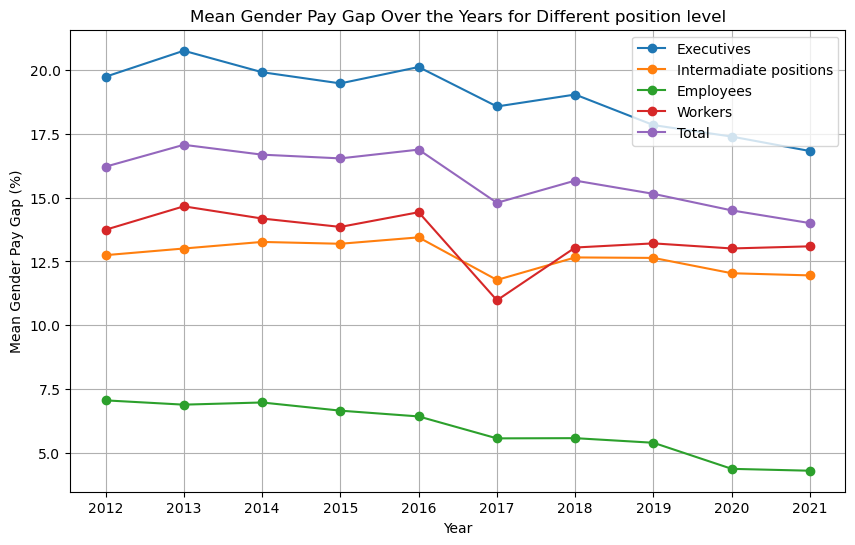

In [21]:
plt.figure(figsize=(10, 6))

plt.plot(mean_gender_gap_results_executive.keys(), mean_gender_gap_results_executive.values(), marker='o', linestyle='-', label='Executives')

plt.plot(mean_gender_gap_results_Intermadiate.keys(), mean_gender_gap_results_Intermadiate.values(), marker='o', linestyle='-', label='Intermadiate positions')

plt.plot(mean_gender_gap_results_employee.keys(), mean_gender_gap_results_employee.values(), marker='o', linestyle='-', label='Employees')

plt.plot(mean_gender_gap_results_worker.keys(), mean_gender_gap_results_worker.values(), marker='o', linestyle='-', label='Workers')

plt.plot(mean_gender_gap_results.keys(), mean_gender_gap_results.values(), marker='o', linestyle='-', label='Total')

plt.title('Mean Gender Pay Gap Over the Years for Different position level')
plt.xlabel('Year')
plt.ylabel('Mean Gender Pay Gap (%)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
pd.DataFrame([mean_gender_gap_results, mean_gender_gap_results_executive, mean_gender_gap_results_Intermadiate, mean_gender_gap_results_employee, mean_gender_gap_results_worker], 
             index = [ "Total worker", "Executive", "Intermediate position","Employee", "Worker"], 
             columns = ['2012', "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"])

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Total worker,16.213745,17.071548,16.685229,16.539097,16.882971,14.798850,15.668732,15.149589,14.501214,14.003264
Executive,19.737738,20.757775,19.916202,19.477415,20.118920,18.573306,19.041271,17.842992,17.393655,16.826341
Intermediate position,12.747443,13.008051,13.265853,13.193756,13.444734,11.776256,12.658572,12.639596,12.039079,11.954351
Employee,7.057910,6.889948,6.975301,6.654729,6.428762,5.569092,5.577153,5.396504,4.374782,4.301269
Worker,13.742249,14.660851,14.182820,13.854233,14.429678,10.979227,13.046875,13.209284,13.010003,13.093642


## **2. Analyzing Gender Pay Disparities (2012-2018)**
### **Trends in Gender Pay Gaps**

### **Factors Influencing Pay Disparities**

### **Geographic Variations**

### **Occupational and Age-Based Analysis**

## **3. Legislative Changes and Impact (2019-2021)**

### **Overview of Legislative Changes**
The law enacted in September 2018, officially titled "Loi pour la Liberté de choisir son Avenir Professionnel" (Law for the Freedom to Choose One's Professional Future), included measures specifically designed to reduce gender pay gaps. The key component are the following: 
- Companies with 50 or more employees were required to calculate and publish their Gender Pay Gap Index. This index is a numerical score out of 100 that reflects the difference in average gross hourly earnings between men and women within the organization.
- Companies failing to meet the requirements or achieving a score below a certain threshold faced financial penalties. The penalty increased with the severity of the pay gap.
- Companies with a Gender Pay Gap Index below the threshold were obligated to implement corrective measures to address and rectify the disparities. These measures aimed at promoting gender equality within the workforce.
- The legislation promoted increased transparency by requiring companies to communicate the Gender Pay Gap Index to their employees and to the French labor authorities.
- The law encouraged companies to promote transparency in salary negotiations and salary structures to ensure fairness and equity.
- In addition to the Gender Pay Gap Index, companies were required to report on other gender-related indicators, such as the distribution of individual raises, promotions, and the return of employees from maternity leave.

Reference: __[French ministry of labor website](https://travail-emploi.gouv.fr/IMG/pdf/loi_pour_la_liberte_de_choisir_son_avenir_professionnel-2.pdf)__

### **Initial Effects on Gender Pay Gaps**

### **Analyzing Trends Post-Legislation**

### **Evaluating Compliance and Enforcement**

## **4. Comparative Analysis**

    Contrasting Gender Pay Disparities Before and After Legislative Changes
    Identifying Shifts in Trends
    Notable Regional or Sectoral Changes

## **5. Predictive Modeling for the Future**

    Methodology for Predictive Modeling
    Selection of Predictive Features
    Building and Evaluating the Model
    Insights into Future Gender Pay Trends

## **Conclusion**
    Interpretation of Findings
    Implications of Legislative Changes
    Challenges and Opportunities
    Recommendations for Further Research
    Concluding Remarks